# **Solución Numérica de la Ecuación del Calor**
La ecuación del calor es de la forma

$$\begin{equation*}
\frac{\partial u}{\partial t} = \kappa \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} +
\frac{\partial^2 u}{\partial z^2} \right)
\end{equation*}$$
donde la constante $\kappa$ es el coefficiente de difusividad.

La Ecuación del Calor describe el flujo de calor en una región mediante los cambios de la Temperatura $u(x,t)$.

En un medio unidimensional $x$, la ecuación se simplifica

$$\begin{equation*}
\frac{\partial u}{\partial t} = \kappa \left( \frac{\partial^2 u}{\partial x^2}
\right)
\end{equation*}$$

# **Resolviendo la Ecuación de Calor mediante Diferencias Finitas.**
El **método de diferencias finitas** utiliza Series de Taylor para aproximar las derivadas.

**Aproximación de la primer derivada.**

Si se conoce el valor de una función $f(x)$ en un punto $x_0$, se puede conocer el valor en una vecindad $x_0 + h$, con $h$ pequeño, utilzando una Serie de Taylor

$$\begin{equation*}
f(x_0+h) \approx f(x_0) + \frac{h}{1!}f'(x_0) +  \mathcal{O}(h^2)
\end{equation*}$$
de la ecuación anterior, obtenemos el valor aproximado de la primer derivada

$$\begin{equation*}
f'(x_0) \approx \frac{f(x_0 +h) - f(x_0)}{h} + \mathcal{O}(h^2)
\end{equation*}$$
El término $\mathcal{O}(h^2)$ denota términos de orden $h^2$ y superior.

Esta aproximación de la primera derivada, se le conoce como diferencias finitas de $f'(x_0)$ hacia enfrente, porque involucra un punto hacia enfrente en la derivada.

De la misma forma se obtiene el término de diferencias finitas hacia atrás

$$\begin{equation*}
f'(x_0) \approx \frac{f(x_0) - f(x_0-h)}{h} + \mathcal{O}(h^2)
\end{equation*}$$
Podemos promediar las dos ecuaciones anteriores y se obtiene una diferencia finita centrada de orden superior

$$\begin{equation*}
f'(x_0) \approx \frac{f(x_0 +h) - f(x_0 -h)}{2h} + \mathcal{O}(h^3)
\end{equation*}$$

**Aproximación de la segunda derivada**

Podemos utilizar esta última ecuación para calcular la aproximación de la segunda derivada

$$\begin{equation*}
f''(x_0) \approx \frac{f'(x_0 +h) - f'(x_0)}{h} + \mathcal{O}(h^2)
\end{equation*}$$
y substituimos $f(x_0 + h)$ por una diferencia finita hacia atrás

$$\begin{equation*}
f'(x_0 +h) \approx \frac{f(x_0 +h) - f(x_0)}{h} + \mathcal{O}(h^2)
\end{equation*}$$
y la derivada $f'(x_0)$ por una diferencia finita hacia atrás

$$\begin{equation*}
f'(x_0) \approx \frac{f(x_0) - f(x_0 -h)}{h} + \mathcal{O}(h^2)
\end{equation*}$$
Finalmente obtenemos la diferencia finita centrada de segundo orden para $f''(x_0)$ que involucra los valores en 3 puntos.

$$\begin{equation*}
f''(x_0) \approx \frac{f(x_0 +h) - 2 f(x_0) + f(x_0 -h)}{h^2} + \mathcal{O}(h^3)
\end{equation*}$$

**Solución de la Ecuación de Calor por un método híbrido.(EDP > EDO)**

Podemos escribir la ecuación del calor como

$$\begin{eqnarray*}
\frac{\partial u(x,t)}{\partial t} & = & \kappa \frac{\partial^2 u(x,t)}{\partial x^2} \\
 & \approx & \kappa \frac{u(x+h,t) - 2 u(x,t) + u(x-h,t)}{h^2} 
\end{eqnarray*}$$
y luego integrar en el tiempo como si tuviéramos una ecuación diferencial ordinaria.


Formalmente, para un determinado punto ($jh,t$), tendremos la ecuación diferencial ordinaria $u(jh,t) = u_j(t)$

$$\begin{equation*}
\frac{d u_j(t)}{dt} = 
\kappa \frac{u_{j+1}(t) - 2 u_j(t) + u_{j-1}(t)}{h^2} 
\end{equation*}$$
para la cual requerimos proporcionar la condición inicial al tiempo $t=0$

$$\begin{equation*}
u(0) = f(x)
\end{equation*}$$

Y condiciones a la frontera:

- $u_0 = c_1, u_N = c_2$, para el tipo de Dirichlet

- Del tipo Neumann, $du_0/dx = 0$ ó $dx_N/dx=0$, para casos de equilibrio térmico.

**Condiciones a la frontera tipo Neumann**

Tenemos que definir cómo estimar la derivada en la frontera, digamos en la frontera $x=L$. Recordando que estamos usando un aproximación de segundo orden para $\partial^2 u/\partial x^2$, debemos encontrar una aproximación para la primer derivada también de orden $h^2$

$$\begin{eqnarray*}
\frac{du}{dx} & = & \frac{u_{N+1} - u_{N-1}}{2h} = 0 \\
            u_{N+1}  & = & u_{N-1} \\  
\end{eqnarray*}$$
aunque formalmente $u_{N+1}$ esta "fuera" de nuestro dominio, pero utilizamos esto para determinar la ecuación que se satisface en la frontera, reemplazando $u_{N+1}   =  u_{N-1}$ en la ecuación del calor obteniendo

$$\begin{equation*}
\frac{d u_N(t)}{dt} = 
\kappa \frac{2 u_{N-1}(t) - 2 u_N(t)}{h^2} 
\end{equation*}$$

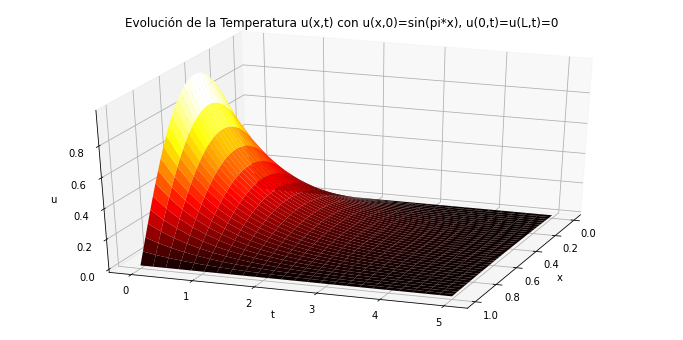

In [1]:
# Solución de la Ecuación del Calor usando scipy.integrate.odeint
# Problema de Valor Inicial y Condiciones a la Frontera Tipo de Dirichlet

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definimos la expresión de diferencias finitas centradas de segundo orden
def odefunc(u, t):
    # Llenamos de ceros inicialmente
    dudt = np.zeros(x0.shape)

    # Condiciones a la Frontera Tipo Dirichlet: Temperatura constante
    # Condiciones a la frontera u(0,t)=u(L,t)=0 
    dudt[0] = 0
    dudt[-1] = 0 # Equivale a evaluar en el último punto N

    # Constante de difusión del calor
    kappa=0.1
    
    # Calculamos la temperatura en los puntos interiores 1 a N-1.
    for i in range(1, N-1):
        dudt[i] = kappa*(u[i + 1] - 2*u[i] + u[i - 1]) / h**2
    return dudt

# Algunos parámetros
# Intervalo en x = (a,b)
a = 0
b = 1
# Tiempo inicial y final
t0 = 0
tf = 5.0

# Número de puntos en la dirección x
N = 40
# Tamaño de delta x
h = (b-a)/(N-1)

# Contantes de diferencias finitas
#k = 0.25*h**2
#r = k/h**2;

# Los puntos en el dominio x
x = np.linspace(a, b, N);

# La condición inicial u(x,0)=sin(pi*x)
x0 = np.sin(np.pi*x)
x0[x0 < 0] = 0

# Puntos de integración en el tiempo
tspan = np.linspace(t0, tf, 25);

# Solución usando scipy.integrate.odeint
sol = odeint(odefunc, x0, tspan)

#%% Make a 3d figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x, tspan)
ax.plot_surface(SX, ST, sol, cmap='hot', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=30, azim=20)
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=sin(pi*x), u(0,t)=u(L,t)=0')
plt.show()

**Ejercicio 1:**

Resuelva la Ecuación del calor, usando el método anterior para el siguiente caso:



**Caso a)**

Una barra metálica de longitud $L=10$, y coeficiente de difusión $\kappa=100$. Condición inicial (Temperatura dentro de la barra): u(x,0) = 0.

Condiciones a la frontera: u(0,t)=10, u(L,t)=0.

Realice los cálculos hasta alcanzar el equilibrio térmico.

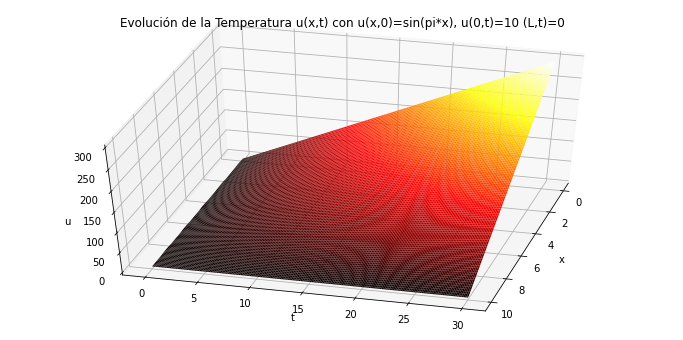

In [10]:
def ecalor(u,t):

#Llenamos de ceros inicialmente
  dudt=np.zeros(x0.shape)
#Condiciones a la frontera
  dudt[0]=10
  dudt[-1]=0
  kappa=100
  
  for i in range(1,N-2):
    dudt[i] = kappa*((u[i + 1] - 2*u[i] + u[i - 1] )/ (h**2) ) 
  return dudt

#Condiciones Iniciales
a=0
b=10
t0=0.0
tf=30.0
N=100
h = (b-a)/(N-1)

# Los puntos en el dominio x
x = np.linspace(a, b, N);

# La condición inicial u(x,0)=sin(pi*x)
x0 = np.sin(np.pi*x)
x0[x0 < 0] = 0

tspan = np.linspace(t0, tf, 200);

#Usamos scipy.integrate.odeint
sol = odeint(ecalor, x0, tspan)


#%% Make a 3d figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x, tspan)
ax.plot_surface(SX, ST, sol, cmap='hot', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=45, azim=15)
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=sin(pi*x), u(0,t)=10 (L,t)=0')
plt.show()

**Caso b)**

Un material de longitud $L=10$ con coeficiente de difusión térmica $\kappa=0.25$

Condición inicial u(x,0)=20.

Condiciones a la frontera: u(0,t)=(20 + 10 sin(pi*t/12), u(L,t)=20.

Realice los cálculos para t=(0,48)

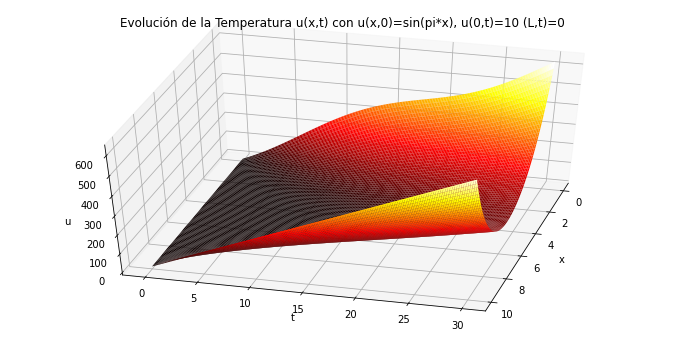

In [11]:
def ecalor(u,t):

#Llenamos de ceros inicialmente
  dudt=np.zeros(x0.shape)+20
#Condiciones a la frontera
  dudt[0]=20 + 10 *np.sin(np.pi*t/12)
  dudt[-1]=20
  kappa=0.25
  
  for i in range(1,N-2):
    dudt[i] = kappa*((u[i + 1] - 2*u[i] + u[i - 1] )/ (h**2) ) 
  return dudt

#Condiciones Iniciales
a=0
b=10
t0=0.0
tf=30.0
N=100
h = (b-a)/(N-1)

# Los puntos en el dominio x
x = np.linspace(a, b, N);

# La condición inicial u(x,0)=sin(pi*x)
x0 = np.sin(np.pi*x)
x0[x0 < 0] = 0

tspan = np.linspace(t0, tf, 200);

#Usamos scipy.integrate.odeint
sol = odeint(ecalor, x0, tspan)


#%% Make a 3d figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x, tspan)
ax.plot_surface(SX, ST, sol, cmap='hot', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=45, azim=15)
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=sin(pi*x), u(0,t)=10 (L,t)=0')
plt.show()


**Aproximación Ecuación de Calor por el método de diferencias finitas**

Un método para resolver la Ecuación del Calor es usar diferencias finitas hacia enfrente en el tiempo y diferencias finitas centradas en el espacio.

Discretizamos el espacio-tiempo, mediante una malla:

- Definimos n puntos entre x=0 y x=L, separados una distancia $\Delta x$.
- Definimos m puntos entre t=0 y t, separados en lapsos de tiempo $\Delta t$.

Supodremos que el incremento en el tiempo es $k=\Delta t$ y en el espacio $h=\Delta x$. La Ecuación del Calor es

$$\begin{equation*}
\frac{u(x,t+k) - u(x,t)}{k} = 
\frac{u(x+h,t) - 2 u(x,t) + u(x-h,t)}{h^2} + \mathcal{O}(h^3,k^2)
\end{equation*}$$
donde error de aproximación es de orden $\mathcal{O}(h^3,k^2)$

Si denotamos la temperatura en el punto $(x,t) = (jh,nk)$, por $u(x_j, t_n$) = $u_j^n$, la ecuación anterior se puede representar geométricamente por la "molécula computacional"



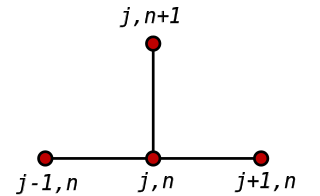

**Implementando el método de diferencias finitas**

Si conocemos la condición inicial $u(x,0)=f(x)$ y las condiciones a la frontera $u(0,t), u(L,t)$ podemos calcular sin problema el valor desconocido de la temperatura en el tiempo $t=k$, $u(x,k)$. Una vez hecho lo anterior, podremos conocer la temperatura al tiempo $t=2k$, $u(x,2k)$ y así sucesivamente.



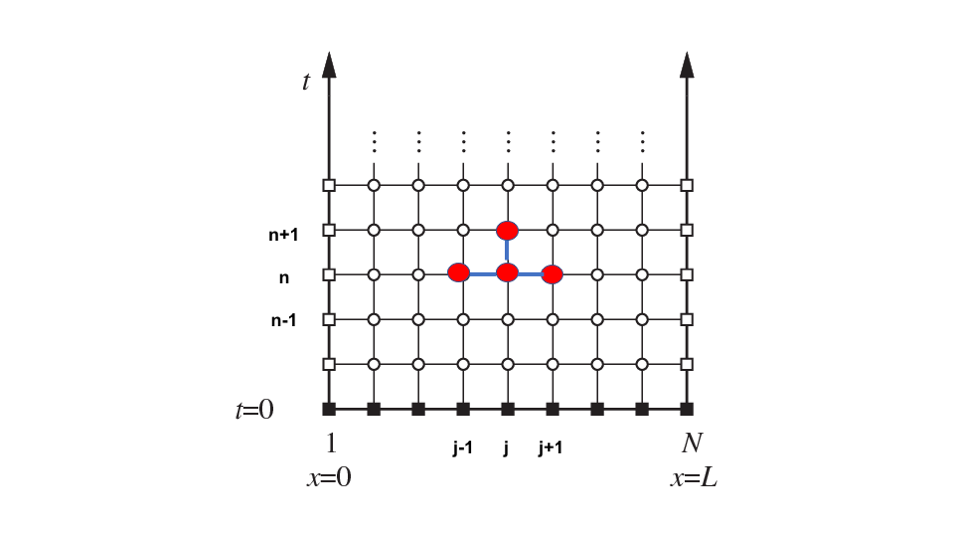

Despejamos la ecuación anterior para el valor desconocido $u(x,t+k)$, resultando

$$\begin{eqnarray*}
u(x,t+k) & = & u(x,t) + \frac{k}{h^2} 
\left( u(x+h,t) - 2 u(x,t) + u(x-h,t) \right) \\
         & = & r u(x+h,t) + (1 -2r) u(x,t) + r u(x-h,t)
\end{eqnarray*}$$
donde $r=\frac{k}{h^2}$.

Podemos simplificar la notación en la ecuación anterior

$$\begin{eqnarray*}
u_j^{new} & = & u_j + \kappa \frac{k}{h^2} 
\left( u_{j+1} - 2 u_j + u_{j-1} \right) \\
         & = & \alpha u_{j+1} + (1 -2\alpha) u_j + \alpha u_{j-1}
\end{eqnarray*}$$
donde hemos definido $\alpha = \kappa k /h^2$.

**NOTA IMPORTANTE:** El método de diferencias finitas anterior para resolver la Ecuación del Calor es **estable y convergente si y sólo si** $r \leq 1/2$.

dt/dx**2 < 0.5? 0.4000800160032006


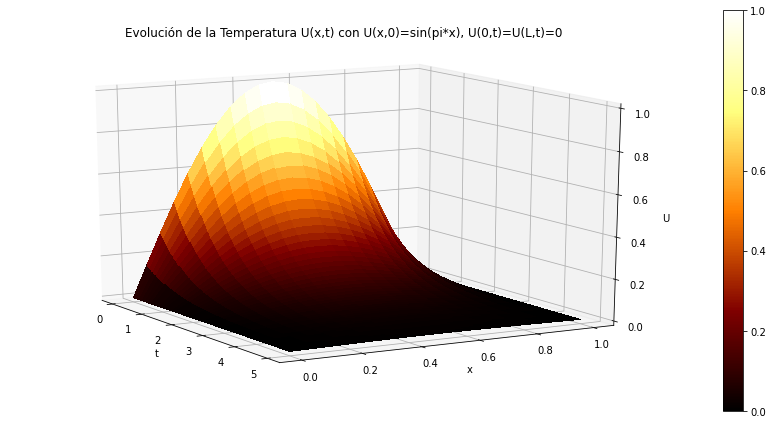

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
  

# Hay que jugar con los puntos por la restricción de estabilidad y convergencia
M = 21 # Número de puntos en el eje x
N = 5000 # Número de puntos en el tiempo

x0 = 0
xL = 1 # Longitud de la barra

t0 = 0
tF = 5.0 # Tiempo final

dx = (xL - x0) / (M - 1) # tamaño discretización en x
dt = (tF - t0) / (N - 1) # tamaño de la dicretización en t
print('dt/dx**2 < 0.5?', dt/dx**2)

kappa = 0.1 # difusividad térmica

alpha = kappa * dt / dx**2 # Coeficiente en la Ecuación

# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

# Define el tamaño de la matrix de la solución y la inicia con ceros
U = np.zeros((M, N))

# Condición inicial
U[:, 0] = np.sin(np.pi*xspan)
#U[:,0] = np.zeros(xspan.shape)
# Condiciones a la Frontera tipo Dirichlet
U[0, :] = 0
U[-1, :] = 0

# Método de diferencias finitas Ec. del Calor
# Loops anidados
for k in range(0, N-1): # Avance en el tiempo
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='afmhot',
                       linewidth=0.01, antialiased=False)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='afmhot')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) con U(x,0)=sin(pi*x), U(0,t)=U(L,t)=0')

# Punto del observador 
ax.view_init(elev=15, azim=-30)

plt.tight_layout()
plt.show()


**Problema 2:**

Variaciones de la Temperatura en el Suelo

La superficie de la Tierra recibe radiación solar durante el día. Esta Energía la transforma en calor, y cambia la temperatura dentro del suelo. Por la noche al no recibir radiación solar la emite a la atmósfera.

Si suponemos que la temperatura del suelo varía con la profundidad, podemos suponer que tenemos un problema unidimensional, siendo el eje $x$ la dirección hacia dentro del suelo.

A cierta profundidad $x=L$, suponemos que la temperatura ya no cambia, es decir $\partial u/\partial x = 0$ (Condición de Neumann).

Supondremos que la variación de la temperatura en la superficie terrestre varía como

$$\begin{equation*}
u(0,t) = u_0 + u_a \sin (\frac{2\pi t}{P})
\end{equation*}$$
donde $u_0$ es la inical temperatura promedio del suelo y $u_a$ es la temperatura del aire. La constante $P$ es el periodo de variación diaria de temperatura $P=24 h=86,400 s$.

En este caso la constante de difusión de calor es $\kappa = 1.0 \times 10^{-6}$. El tiempo será medido en segundos.

Usando la Ecuación de Calor, determina numéricamente la variación del perfil de temperatura dentro del suelo, por ejemplo para Hermosillo en estos días supongamos que $u_0=15ºC$, $u_a= 20ºC$.

Realiza una simulación de al menos 48 horas.

dt/dx**2 < 0.5? 345.6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: UserWarning: The following kwargs were not used by contour: 'lw'


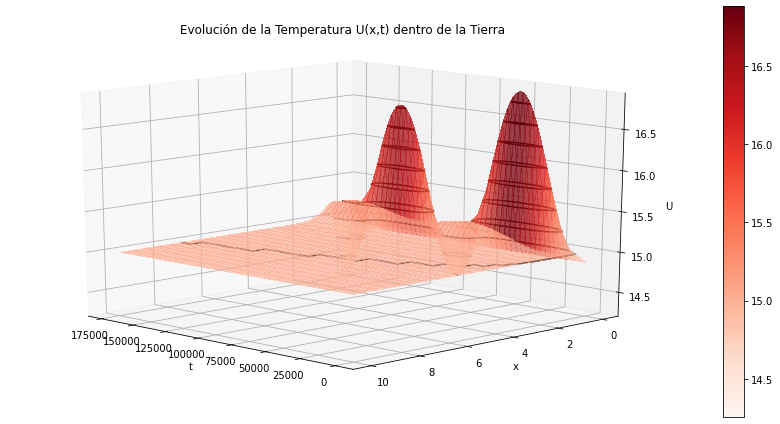

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Hay que jugar con los puntos por la restricción de estabilidad y convergencia
M = 21 # Número de puntos en el eje x
N = 2001 # Número de puntos en el tiempo

x0 = 0
xL = 10 

t0 = 0
tf = 172800 # Tiempo final 

dx = (xL - x0) / (M - 1) # tamaño discretización en x
dt = (tf - t0) / (N - 1) # tamaño de la dicretización en t
print('dt/dx**2 < 0.5?', dt/dx**2)

kappa = 1*10**(-6) # difusividad térmica

alpha = kappa * dt / dx**2 # Coeficiente en la Ecuación

# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tf, N)

# Define el tamaño de la matrix de la solución y la inicia con ceros
U = np.zeros((M, N))

# Condición inicial
#U[:, 0] = np.sin(np.pi*xspan)
# T0 = 20ºC 
U[:,0] = 15.0*np.ones(xspan.shape)
# Condiciones a la Frontera tipo Dirichlet
#U[0, :] = 20 + 10*np.sin(np.pi*t/12.0)
#U[-1, :] = 20.0

# Método de diferencias finitas Ec. del Calor
# Loops anidados
for k in range(0, N-1): # Avance en el tiempo
    # Condiciones a la frontera (varía con el tiempo) 
    t=k*dt
    U[0, :] = 15 + 20*np.sin(2*np.pi*t/86400)
    U[-1, :] = 15
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)
# Contornos
ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles="solid", offset=10)

# Grafica una tabla de valores 
m = plt.cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) dentro de la Tierra ')

# Punto del observador 
ax.view_init(elev=15, azim=135)


plt.tight_layout()
plt.show()

## **Soluciones del Ejercicio 1**
Resuelva la Ecuación del calor, usando el método anterior para el siguiente caso:

**Caso a)** Una barra metálica de longitud 𝐿=10 , y coeficiente de difusión 𝜅=100 .

Condición inicial (Temperatura dentro de la barra): u(x,0) = 0.

Condiciones a la frontera: u(0,t)=10, u(L,t)=0.

Realice los cálculos hasta alcanzar el equilibrio térmico.

**Caso b)** Un material de longitud 𝐿=10 con coeficiente de difusión térmica 𝜅=0.25

Condición inicial u(x,0)=20.

Condiciones a la frontera: u(0,t)=(20 + 10 sin(pi*t/12), u(L,t)=20.

Realice los cálculos para t=(0,48)

Pueden ajustar los parámetros para ver cómo cambia la temperatura dentro del cuerpo.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:84: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: UserWarning: The following kwargs were not used by contour: 'lw'


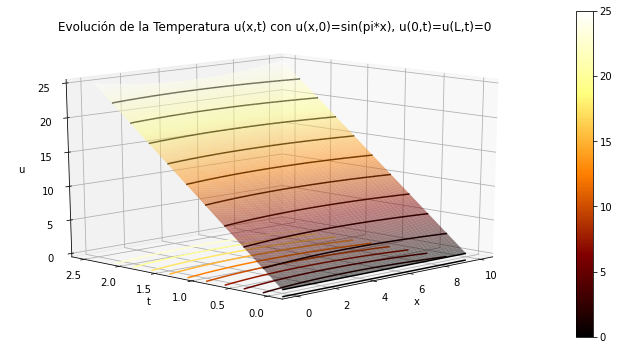

In [13]:
# Tiene error aún..... (Pendiente)
# No funciona la función odeint para resolver problemas de valores a la frontere
# El resultado no tiene sentido físico

# Ejercicio 1a)
# Solución de la Ecuación del Calor usando scipy.integrate.odeint
# Problema de Valor Inicial y Condiciones a la Frontera Tipo de Dirichlet

import numpy as np
from scipy.integrate import odeint, solve_ivp, solve_bvp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Definimos la expresión de diferencias finitas centradas de segundo orden
def odefunc(u, t):
    # Llenamos de ceros inicialmente
    dudt = np.zeros(x.shape)

    # Condiciones a la Frontera Tipo Dirichlet: Temperatura constante
    # Valor de Entrada necesario
    # u[0] = 10.0
    # Condiciones a la frontera u(0,t)=u(L,t)=0 
    dudt[0] = 10.0
    dudt[-1] = 10.0 # Equivale a evaluar en el último punto N
    #u[0] = dudt[0]
    # Constante de difusión del calor
    kappa=100.0
    
    # Calculamos la temperatura en los puntos interiores 1 a N-1.
    for i in range(1, N-1):
          dudt[i] = kappa*(u[i + 1] - 2*u[i] + u[i - 1]) / h**2
    return dudt

def bc(ua, ub):
    return np.array([u[0], u[-1]])


# Algunos parámetros
# Intervalo en x = (a,b)
a = 0
b = 10
# Tiempo inicial y final
t0 = 0
tf = 2.5

# Número de puntos en la dirección x
N = 51
# Número de pasos de integración en t
Ntstep = 100
# Tamaño de delta x
h = (b-a)/(N-1)

# Contantes de diferencias finitas
#k = 0.25*h**2
#r = k/h**2;

# Los puntos en el dominio x
x = np.linspace(a, b, N);

# La condición inicial u(x,0)=sin(pi*x)
x0 = np.zeros(x.shape)

#x0[x0 < 0] = 0

# Puntos de integración en el tiempo
tspan = np.linspace(t0, tf, Ntstep);

# Solución usando scipy.integrate.odeint
sol = odeint(odefunc, x0, tspan)
#sol = solve_ivp(odefunc, (t0,tf), y0=x0, method='RK45', t_eval=tspan)
#sol = solve_bvp(odefunc, bc, x0, tspan)

#%% Make a 3d figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x,tspan)
# Ver mapa de colores de Matplotlib
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
ax.plot_surface(SX, ST, sol, cmap='afmhot', rstride=1, cstride=1, alpha=0.5)

# Contornos
ax.contour(SX, ST, sol, 10, lw=1, colors="k", linestyles="solid")
ax.contour(SX, ST, sol, 10, lw=1, cmap="afmhot", linestyles="solid", offset=-1)


# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='afmhot')
m.set_array(sol)
plt.colorbar(m)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=15, azim=-135)
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=sin(pi*x), u(0,t)=u(L,t)=0')
plt.show()

In [14]:
sol.shape

(100, 51)

In [15]:

odefunc(x0,0).shape

(51,)

dt/dx**2 < 0.5? 0.002


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: UserWarning: The following kwargs were not used by contour: 'lw'


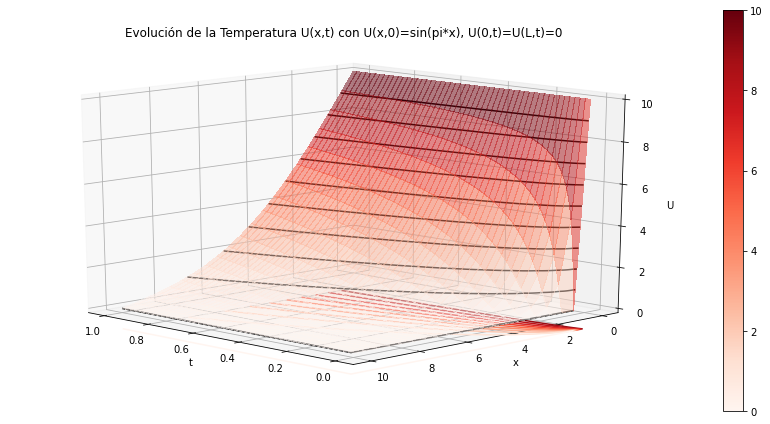

In [16]:
# Usando código de diferencias finitas para resolver Ejercicio 1a)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
  

# Hay que jugar con los puntos por la restricción de estabilidad y convergencia
M = 21 # Número de puntos en el eje x
N = 2001 # Número de puntos en el tiempo

x0 = 0
xL = 10 # Longitud de la barra

t0 = 0
tF = 1.0 # Tiempo final

dx = (xL - x0) / (M - 1) # tamaño discretización en x
dt = (tF - t0) / (N - 1) # tamaño de la dicretización en t
print('dt/dx**2 < 0.5?', dt/dx**2)

kappa = 10.0 # difusividad térmica

alpha = kappa * dt / dx**2 # Coeficiente en la Ecuación

# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

# Define el tamaño de la matrix de la solución y la inicia con ceros
U = np.zeros((M, N))

# Condición inicial
#U[:, 0] = np.sin(np.pi*xspan)
U[:,0] = np.zeros(xspan.shape)
# Condiciones a la Frontera tipo Dirichlet
U[0, :] = 10
U[-1, :] = 0

# Método de diferencias finitas Ec. del Calor
# Loops anidados
for k in range(0, N-1): # Avance en el tiempo
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)

# Contornos
ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles="solid", offset=-1)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) con U(x,0)=sin(pi*x), U(0,t)=U(L,t)=0')

# Punto del observador 
ax.view_init(elev=15, azim=135)

plt.tight_layout()
plt.show()

dt/dx**2 < 0.5? 0.0256


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: UserWarning: The following kwargs were not used by contour: 'lw'


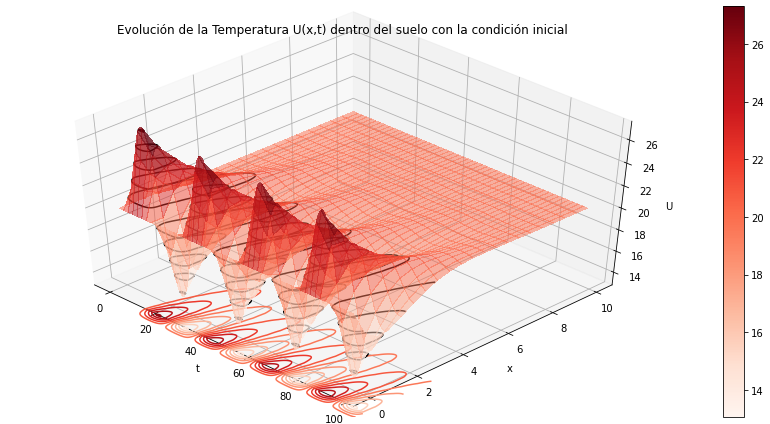

In [17]:
# Solución de 1b)
# Variaciones de la Temperatura dentro del suelo
# Usando código de diferencias finitas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
  

# Hay que jugar con los puntos por la restricción de estabilidad y convergencia
M = 21 # Número de puntos en el eje x
N = 15001 # Número de puntos en el tiempo

x0 = 0
xL = 10 # Longitud de la barra

t0 = 0
tF = 96 # Tiempo final

dx = (xL - x0) / (M - 1) # tamaño discretización en x
dt = (tF - t0) / (N - 1) # tamaño de la dicretización en t
print('dt/dx**2 < 0.5?', dt/dx**2)

kappa = 0.25 # difusividad térmica

alpha = kappa * dt / dx**2 # Coeficiente en la Ecuación

# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

# Define el tamaño de la matrix de la solución y la inicia con ceros
U = np.zeros((M, N))

# Condición inicial
#U[:, 0] = np.sin(np.pi*xspan)
# La temperatura inicial es de 20ºC dentro de la tierra
U[:,0] = 20.0*np.ones(xspan.shape)

# Condiciones a la Frontera tipo Dirichlet
#U[0, :] = 20 + 10*np.sin(np.pi*t/12.0)
#U[-1, :] = 20.0

# Método de diferencias finitas Ec. del Calor
# Loops anidados
for k in range(0, N-1): # Avance en el tiempo
    # Condiciones a la frontera (varía con el tiempo) 
    t=k*dt
    U[0, :] = 20 + 10*np.sin(np.pi*t/12.0)
    U[-1, :] = 20.0
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)
# Contornos
ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles="solid", offset=10)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) dentro del suelo con la condición inicial ')

# Punto del observador 
ax.view_init(elev=45, azim=-45)


plt.tight_layout()
plt.show()
